# Web Scrape Project!

In [1]:
import urllib.request
from bs4 import BeautifulSoup as bS
import pandas as pd
import os
from matplotlib import pyplot as plt

In [2]:
# identify website and scrape
url1 = "https://en.wikipedia.org/wiki/BRICS"
page1 = urllib.request.urlopen(url1)
ncsoup = bS(page1, "lxml")
# select specific instance to extract
member_table = ncsoup.find("table", class_="wikitable sortable")

In [3]:
# Find all rows in table
table=member_table.find_all('tr')

# prepare data for table presentation using a list of dictionaries
countryList=[]
countryDict={}
for i in range(len(table)):
    cells = table[i].find_all('td')
    if len(cells)!=0:
        countries = cells[0].find('a')
        if countries==None:
            continue
        else:
            countryDict['Country']=cells[0].find('a').text
            countryDict['Population, millions']=cells[1].find('span').text.replace(',','')
            countryDict['Nominal GDP, trillions']=cells[2].find(text=True).replace(',','')
            if cells[3]!=None:
                countryDict['PPP GDP, billions']=cells[3].find(text=True).text.replace(',','')
            countryDict['Nom per Capita']=cells[4].find(text=True).text.replace(',','')
            countryDict['PPP per Capita']=cells[5].find(text=True).text.replace(',','')
            # Removed extraneous chars from numerics
            countryDict['GDP Growth 2023 (est), %']=cells[6].find(text=True)[0:-1]
            if cells[7]!=None:
                countryDict['Foreign Exch, millions']=cells[7].find('span').text.replace(',','')[1:-2]
            countryDict['Household Consumption']=cells[8].find(text=True).replace(',','')[1:]
            countryDict['Govenment Spending, billions']=cells[9].find(text=True).replace(',','')[1:-3]
            countryDict['Exports, billions']=cells[10].find(text=True).replace(',','')[1:-3]
            countryDict['Imports, billions']=cells[11].find(text=True).replace(',','')[1:-3]
            countryDict['Literacy Rate']=cells[12].find(text=True).replace(',','')[:-1]
            countryDict ['Life Expectancy']=cells[13].find(text=True).replace(',','')[:-4]
            countryDict['Human Development Index']=cells[14].find(text=True).replace(',','')[:5]
        countryList.append(countryDict.copy())

df=pd.DataFrame.from_records(countryList)

In [4]:
# Make Population more manageable for graphing
df['Population, billions'] = df['Population, millions'].astype(float)
for index, item in enumerate(df['Population, billions']):
        df['Population, billions'][index] = item/1000
        
# Make GDP more manageable for graphing
df['PPP GDP, trillions'] = df['PPP GDP, billions'].astype(float)
for index, item in enumerate(df['PPP GDP, trillions']):
        df['PPP GDP, trillions'][index] = item/1000 

# Make Foreign Exchg more manageable for graphing
df['Foreign Exch, billions'] = df['Foreign Exch, millions'].astype(int)
for index, item in enumerate(df['Foreign Exch, billions']):
        df['Foreign Exch, billions'][index] = item/1000
        
# remove old versions of columns
df.drop(columns=['Population, millions', 'Foreign Exch, millions', 'PPP GDP, billions'], inplace=True)

C:\Users\jhcha\AppData\Local\Temp/ipykernel_13476/3155927284.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Population, billions'][index] = item/1000
C:\Users\jhcha\AppData\Local\Temp/ipykernel_13476/3155927284.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PPP GDP, trillions'][index] = item/1000
C:\Users\jhcha\AppData\Local\Temp/ipykernel_13476/3155927284.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Forei

In [5]:
df

,Country,"Nominal GDP, trillions",Nom per Capita,PPP per Capita,"GDP Growth 2023 (est), %",Household Consumption,"Govenment Spending, billions","Exports, billions","Imports, billions",Literacy Rate,Life Expectancy,Human Development Index,"Population, billions","PPP GDP, trillions","Foreign Exch, billions"
0,Brazil,2081,9673,18686,1.6,1,846.6,487.05,158.93,94.30,77.21,0.754,0.20757,4.020,0.355
1,Russia,2062,14403,31967,0.7,856,414.0,492.31,231.55,99.7,72.9,0.822,0.14396,4.649,0.600
2,India,3386,2601,8293,5.9,1,650.0,750.89,598.20,79.1,71.4,0.633,1.42509,11.665,0.633
3,China,18100,13721,21291,5.2,5,2031.0,3026.0,2055.0,96.4,77.4,0.768,1.41504,30.074,3.480
4,South Africa,435.500,6485,15556,0.1,211,95.27,123.73,68.97,94.3,64.8,0.713,0.05740,990.030,0.053


In [6]:
df.to_csv("webscrape_assignment.csv", index=False)

In [7]:
web_scrape = pd.read_csv('webscrape_assignment.csv', 
                         dtype={'Population':float, 'PPP GDP, trillions':float, 'GDP Growth 2023 (est), %':float, 
                                'Foreign Exch, billions':float, 'PPP GDP, trillions':float})

# Set new index
web_scrape.set_index('Country', inplace=True)
web_scrape

,"Nominal GDP, trillions",Nom per Capita,PPP per Capita,"GDP Growth 2023 (est), %",Household Consumption,"Govenment Spending, billions","Exports, billions","Imports, billions",Literacy Rate,Life Expectancy,Human Development Index,"Population, billions","PPP GDP, trillions","Foreign Exch, billions"
Country,,,,,,,,,,,,,,
Brazil,2081.0,9673,18686,1.6,1,846.60,487.05,158.93,94.3,77.21,0.754,0.20757,4.020,0.355
Russia,2062.0,14403,31967,0.7,856,414.00,492.31,231.55,99.7,72.90,0.822,0.14396,4.649,0.600
India,3386.0,2601,8293,5.9,1,650.00,750.89,598.20,79.1,71.40,0.633,1.42509,11.665,0.633
China,18100.0,13721,21291,5.2,5,2031.00,3026.00,2055.00,96.4,77.40,0.768,1.41504,30.074,3.480
South Africa,435.5,6485,15556,0.1,211,95.27,123.73,68.97,94.3,64.80,0.713,0.05740,990.030,0.053


### Foreign Exchange and Population

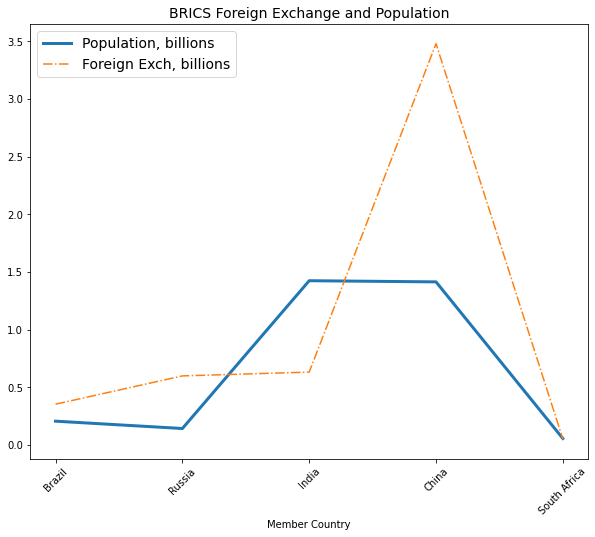

In [8]:
plt.figure(figsize=(10, 8))
plt.plot(web_scrape['Population, billions'], label='Population, billions', linewidth=3)
plt.plot(web_scrape['Foreign Exch, billions'], label='Foreign Exch, billions', linestyle='-.')
plt.xticks(range(0, len(web_scrape['Population, billions'])), web_scrape.index, rotation=45)
plt.title('BRICS Foreign Exchange and Population', fontsize=14)
plt.legend(fontsize=14)
plt.xlabel('Member Country')
plt.show()

### Nominal vs PPP GDP (China omitted)

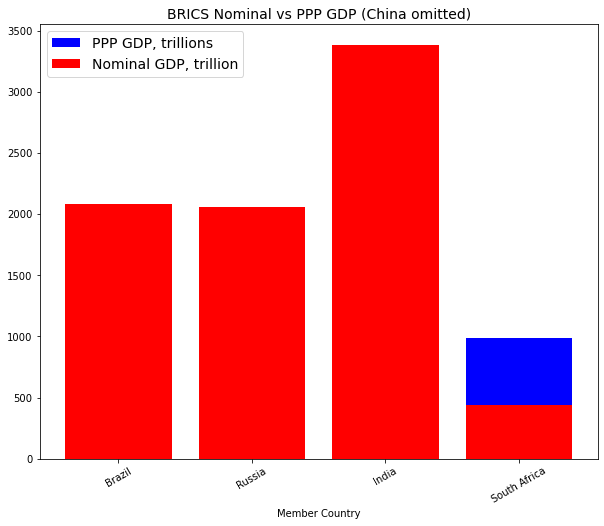

In [9]:
# The relative size of China throws everything else off with this graph, so omitting it
scrape=web_scrape[web_scrape.index!='China']
plt.figure(figsize=(10, 8))
plt.bar(range(0, len(scrape["PPP GDP, trillions"])), scrape['PPP GDP, trillions'], label='PPP GDP, trillions', linewidth=5, color='blue')
plt.bar(range(0, len(scrape["Nominal GDP, trillions"])), scrape['Nominal GDP, trillions'], label='Nominal GDP, trillion', linewidth=5, color='red')

plt.xticks(range(0, len(scrape['Nominal GDP, trillions'])), scrape.index, rotation=30)
plt.title('BRICS Nominal vs PPP GDP (China omitted)', fontsize=14)
plt.legend(fontsize=14)
plt.xlabel('Member Country')

plt.show()

### Life Expectancy, Literacy Rate, and % GDP Growth

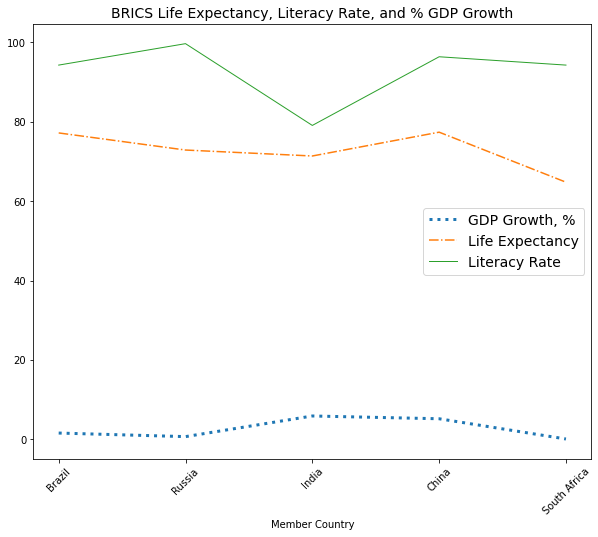

In [10]:
plt.figure(figsize=(10, 8))
plt.plot(web_scrape['GDP Growth 2023 (est), %'], label='GDP Growth, %', linestyle='dotted', linewidth=3)
plt.plot(web_scrape['Life Expectancy'], label='Life Expectancy', linestyle='-.')
plt.plot(web_scrape['Literacy Rate'], label='Literacy Rate', linewidth=1)
plt.xticks(range(0, len(web_scrape['GDP Growth 2023 (est), %'])), web_scrape.index, rotation=45)
plt.title('BRICS Life Expectancy, Literacy Rate, and % GDP Growth', fontsize=14)
plt.legend(fontsize=14)
plt.xlabel('Member Country')
plt.show()